## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.437329  0.085600  1.026969  1.087274 -1.159408  1.223701
1  0.303495 -0.180884 -0.818075 -0.643425  0.547771  0.113202
2 -0.031659  0.568343  1.686414 -0.031987 -1.180838  1.066726
3  1.001984  0.940031 -0.798780 -1.474192 -1.279642 -0.748141
4 -0.656115  0.977381 -0.463369 -0.815558  0.171343 -0.406312


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0155189	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0062524	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9963694	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9862342	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9764256	total: 60ms	remaining: 11.9s
5:	learn: 0.9680389	total: 60.4ms	remaining: 10s
6:	learn: 0.9576003	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9496507	total: 61.7ms	remaining: 7.66s
8:	learn: 0.9399082	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9304161	total: 62.6ms	remaining: 6.2s
10:	learn: 0.9206319	total: 63.1ms	remaining: 5.67s
11:	learn: 0.9112017	total: 63.6ms	remaining: 5.24s
12:	learn: 0.9021420	total: 64.1ms	remaining: 4.86s
13:	learn: 0.8948615	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8883456	total: 65ms	remaining: 4.27s
15:	learn: 0.8799055	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8716715	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8655380	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8580006	total: 66.7ms	remaining: 3.44s

101:	learn: 0.4134495	total: 106ms	remaining: 935ms
102:	learn: 0.4104972	total: 107ms	remaining: 930ms
103:	learn: 0.4065892	total: 107ms	remaining: 924ms
104:	learn: 0.4032752	total: 108ms	remaining: 919ms
105:	learn: 0.4006692	total: 108ms	remaining: 913ms
106:	learn: 0.3976655	total: 109ms	remaining: 909ms
107:	learn: 0.3948560	total: 109ms	remaining: 903ms
108:	learn: 0.3916703	total: 110ms	remaining: 897ms
109:	learn: 0.3887779	total: 110ms	remaining: 891ms
110:	learn: 0.3857198	total: 111ms	remaining: 886ms
111:	learn: 0.3828894	total: 111ms	remaining: 880ms
112:	learn: 0.3803965	total: 112ms	remaining: 875ms
113:	learn: 0.3777082	total: 112ms	remaining: 870ms
114:	learn: 0.3744397	total: 112ms	remaining: 865ms
115:	learn: 0.3709236	total: 113ms	remaining: 861ms
116:	learn: 0.3673745	total: 114ms	remaining: 857ms
117:	learn: 0.3652177	total: 114ms	remaining: 853ms
118:	learn: 0.3630067	total: 114ms	remaining: 848ms
119:	learn: 0.3599283	total: 115ms	remaining: 842ms
120:	learn: 

246:	learn: 0.1481405	total: 176ms	remaining: 536ms
247:	learn: 0.1473085	total: 176ms	remaining: 534ms
248:	learn: 0.1464422	total: 177ms	remaining: 533ms
249:	learn: 0.1455350	total: 177ms	remaining: 531ms
250:	learn: 0.1445774	total: 177ms	remaining: 529ms
251:	learn: 0.1437249	total: 178ms	remaining: 528ms
252:	learn: 0.1426945	total: 178ms	remaining: 526ms
253:	learn: 0.1420195	total: 179ms	remaining: 524ms
254:	learn: 0.1412189	total: 179ms	remaining: 523ms
255:	learn: 0.1404866	total: 179ms	remaining: 521ms
256:	learn: 0.1393575	total: 180ms	remaining: 519ms
257:	learn: 0.1384023	total: 180ms	remaining: 517ms
258:	learn: 0.1375248	total: 180ms	remaining: 516ms
259:	learn: 0.1369329	total: 181ms	remaining: 514ms
260:	learn: 0.1360978	total: 181ms	remaining: 512ms
261:	learn: 0.1353631	total: 181ms	remaining: 511ms
262:	learn: 0.1344466	total: 182ms	remaining: 509ms
263:	learn: 0.1334725	total: 182ms	remaining: 508ms
264:	learn: 0.1328609	total: 182ms	remaining: 506ms
265:	learn: 

500:	learn: 0.0476833	total: 278ms	remaining: 277ms
501:	learn: 0.0474395	total: 279ms	remaining: 276ms
502:	learn: 0.0473847	total: 279ms	remaining: 276ms
503:	learn: 0.0473274	total: 279ms	remaining: 275ms
504:	learn: 0.0471109	total: 280ms	remaining: 274ms
505:	learn: 0.0468965	total: 280ms	remaining: 274ms
506:	learn: 0.0468403	total: 281ms	remaining: 273ms
507:	learn: 0.0465941	total: 281ms	remaining: 272ms
508:	learn: 0.0465418	total: 282ms	remaining: 272ms
509:	learn: 0.0463146	total: 282ms	remaining: 271ms
510:	learn: 0.0462636	total: 283ms	remaining: 270ms
511:	learn: 0.0460393	total: 283ms	remaining: 270ms
512:	learn: 0.0458214	total: 283ms	remaining: 269ms
513:	learn: 0.0457718	total: 284ms	remaining: 268ms
514:	learn: 0.0455649	total: 284ms	remaining: 268ms
515:	learn: 0.0453601	total: 285ms	remaining: 267ms
516:	learn: 0.0451502	total: 285ms	remaining: 267ms
517:	learn: 0.0449574	total: 286ms	remaining: 266ms
518:	learn: 0.0447560	total: 286ms	remaining: 265ms
519:	learn: 

666:	learn: 0.0277660	total: 356ms	remaining: 178ms
667:	learn: 0.0276849	total: 357ms	remaining: 177ms
668:	learn: 0.0276124	total: 357ms	remaining: 177ms
669:	learn: 0.0275789	total: 358ms	remaining: 176ms
670:	learn: 0.0274864	total: 358ms	remaining: 176ms
671:	learn: 0.0274077	total: 359ms	remaining: 175ms
672:	learn: 0.0273750	total: 359ms	remaining: 174ms
673:	learn: 0.0273428	total: 359ms	remaining: 174ms
674:	learn: 0.0272573	total: 360ms	remaining: 173ms
675:	learn: 0.0271131	total: 360ms	remaining: 173ms
676:	learn: 0.0270367	total: 361ms	remaining: 172ms
677:	learn: 0.0269287	total: 361ms	remaining: 171ms
678:	learn: 0.0268655	total: 362ms	remaining: 171ms
679:	learn: 0.0267911	total: 362ms	remaining: 170ms
680:	learn: 0.0267288	total: 362ms	remaining: 170ms
681:	learn: 0.0266978	total: 363ms	remaining: 169ms
682:	learn: 0.0265786	total: 363ms	remaining: 169ms
683:	learn: 0.0265057	total: 364ms	remaining: 168ms
684:	learn: 0.0264233	total: 364ms	remaining: 167ms
685:	learn: 

833:	learn: 0.0165270	total: 434ms	remaining: 86.4ms
834:	learn: 0.0164751	total: 435ms	remaining: 85.9ms
835:	learn: 0.0164082	total: 435ms	remaining: 85.4ms
836:	learn: 0.0163868	total: 436ms	remaining: 84.9ms
837:	learn: 0.0163539	total: 436ms	remaining: 84.4ms
838:	learn: 0.0163322	total: 437ms	remaining: 83.8ms
839:	learn: 0.0163110	total: 437ms	remaining: 83.3ms
840:	learn: 0.0162962	total: 438ms	remaining: 82.7ms
841:	learn: 0.0162496	total: 438ms	remaining: 82.2ms
842:	learn: 0.0162148	total: 438ms	remaining: 81.7ms
843:	learn: 0.0161501	total: 439ms	remaining: 81.1ms
844:	learn: 0.0161177	total: 439ms	remaining: 80.5ms
845:	learn: 0.0160969	total: 439ms	remaining: 80ms
846:	learn: 0.0160520	total: 440ms	remaining: 79.4ms
847:	learn: 0.0160315	total: 440ms	remaining: 78.9ms
848:	learn: 0.0159979	total: 440ms	remaining: 78.3ms
849:	learn: 0.0159775	total: 441ms	remaining: 77.8ms
850:	learn: 0.0159339	total: 441ms	remaining: 77.2ms
851:	learn: 0.0159193	total: 441ms	remaining: 76

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

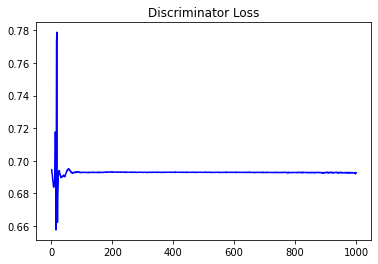

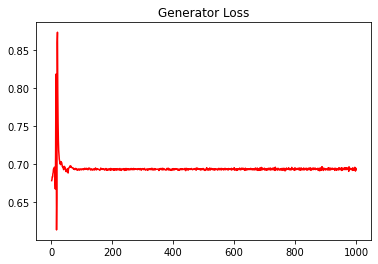

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11768192215649004


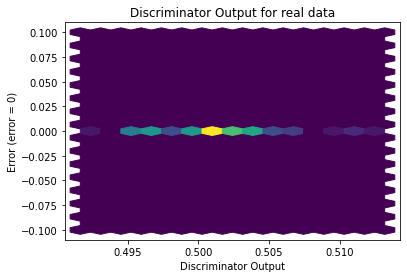

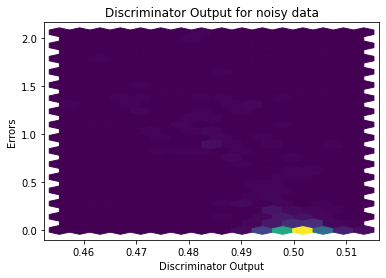

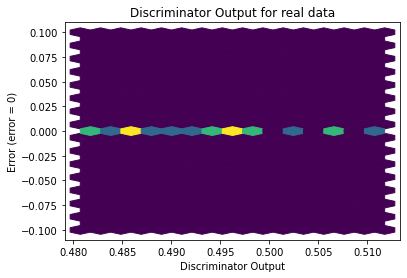

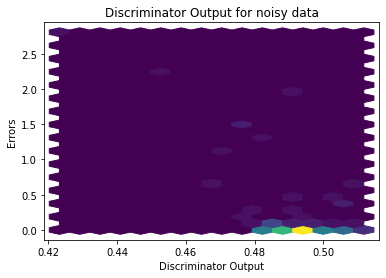

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


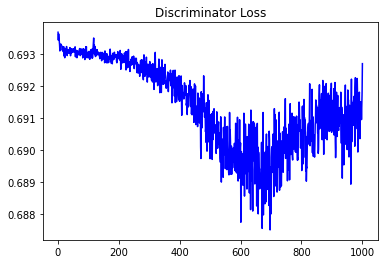

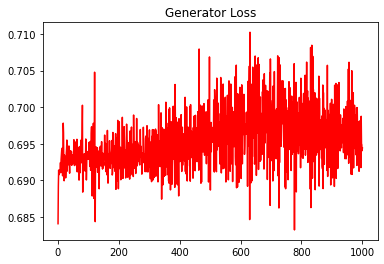

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.044627296558783114


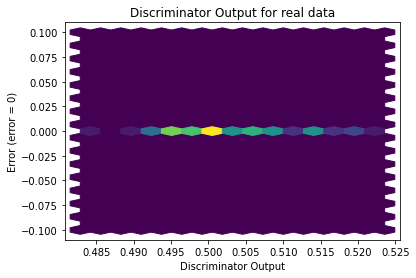

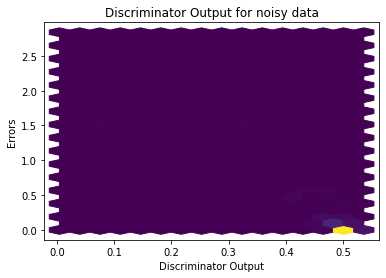

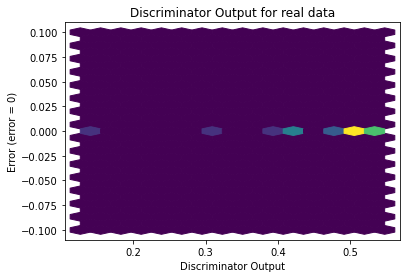

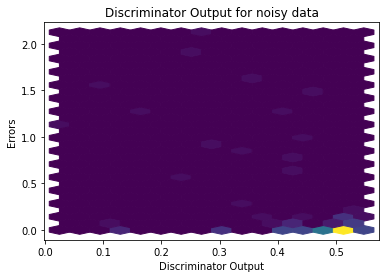

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2035]], requires_grad=True)
